In [11]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [13]:
data = pd.read_csv("/Users/ehunt2/Desktop/Omaha.csv")
data
## pull out just the year (first four digits)
data['Date'] = data['Date'].astype(str).str[0:4].astype(int)
data = data.set_index("Date")

In [14]:
### calculate some slopes
X = data.reset_index().index  ### index going from 0 to length of vector
res = stats.theilslopes(data.Anomaly, X, 0.90, method='separate')  ## theil-sen
lsq_res = stats.linregress(X, data.Anomaly)  ## least squares

### and for 1980-2023
data_sub = data.loc[1980:2023]
X_sub = data_sub.reset_index().index
res_sub = stats.theilslopes(data_sub.Anomaly, X_sub, 0.90, method='separate')  ## theil-sen
lsq_res_sub = stats.linregress(X_sub, data_sub.Anomaly)  ## least squares

print(lsq_res)
print(lsq_res_sub)

LinregressResult(slope=0.011944232238349886, intercept=0.007074951192598378, rvalue=0.07534944138786316, pvalue=0.35460472451532554, stderr=0.012863328288256174, intercept_stderr=1.1307053367434927)
LinregressResult(slope=0.0027011980267794074, intercept=2.474424242424243, rvalue=0.005285582981952749, pvalue=0.9728361153001195, stderr=0.07885565009941786, intercept_stderr=1.969024161874921)


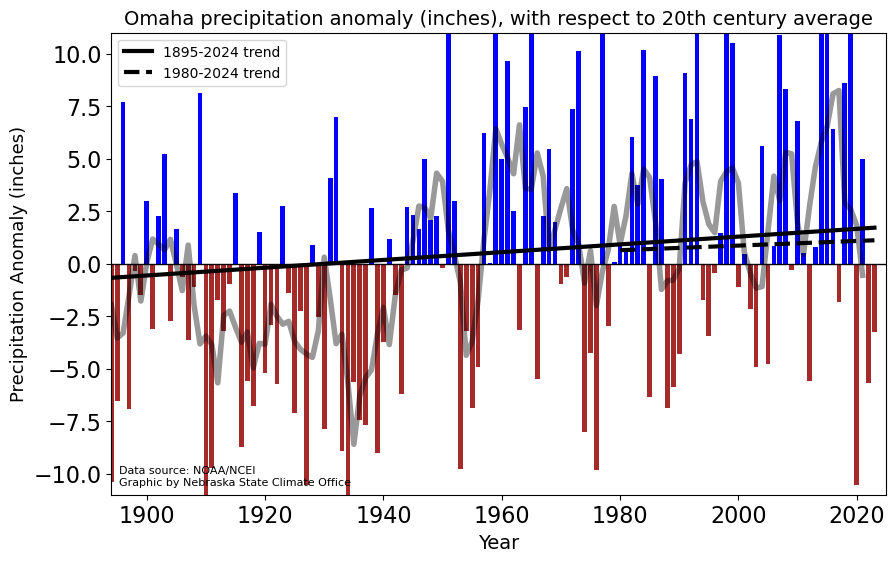

In [10]:
### and add Theil-Sen trend to the plot, following https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.theilslopes.html

fig, ax = plt.subplots(figsize=(10,6))

clrs = ['brown' if (y <= 0) else 'blue' for y in data['Anomaly'] ] #for precip

#clrs = ['blue' if (y <= 0) else 'red' for y in data['Anomaly'] ]  #for temp

p = plt.bar(data.index, data['Anomaly'], linewidth=3, color=clrs)

plt.xlim(1894, 2025)
plt.ylim(-11,11)
plt.xlabel('Year',fontsize=14)

### plot 10-year running mean
rollmean = data['Anomaly'].rolling(5,center=True).mean()
plt.plot(rollmean,lw=4, alpha=0.4, color='black')

### plot the slopes
ax.plot(data.index, res[1] + res[0] * X, color='black', lw=3, linestyle='solid', label='1895-2024 trend')


## and the 1980-2022 slopes
ax.plot(data_sub.index, res_sub[1] + res_sub[0] * X_sub, color='black', lw=3, linestyle='dashed', label='1980-2024 trend')

## Set ticks
#ax.set_xticks([1905, 1915, 1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015])

#plt.ylabel('Cooling Degree Day Anomaly', fontsize=13)
plt.ylabel('Precipitation Anomaly (inches)',fontsize=13)
#plt.ylabel('Temperature Anomaly (°F)',fontsize=13)
#plt.title('Nebraska statewide Cooling Degree Day anomalies, with respect to 20th century average',fontsize=14)
plt.title('Omaha precipitation anomaly (inches), with respect to 20th century average',fontsize=14)
#plt.title('Nebraska statewide June temperature anomaly (°F), with respect to 20th century average',fontsize=14)

plt.axhline(0, linewidth=1, color='black')
plt.tick_params(axis='both',labelsize=13, which='major')
ax.tick_params(axis='both', which='both', labelsize=16)


plt.text(0.01, 0.04, 'Data source: NOAA/NCEI\nGraphic by Nebraska State Climate Office', 
         horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=8)

ax.legend()

plt.show()

fig.savefig('NE_statewide_Pcpanom_AprJun24.png',dpi=300,facecolor='white',transparent=False,bbox_inches='tight')